<a href="https://colab.research.google.com/github/ArchanGhosh/Neural-Network-Examples-and-Practices/blob/master/Wide_and_deep(1_input_2_output).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
%tensorflow_version 2.x

TensorFlow 2.x selected.


In [0]:
import tensorflow as tf
import tensorflow.keras as keras
from sklearn.preprocessing import StandardScaler
import pandas as pd

In [0]:
import matplotlib.pyplot as plt

In [0]:
from keras.datasets import boston_housing

Using TensorFlow backend.


In [0]:
(X_train, y_train), (X_test, y_test) = boston_housing.load_data()

In [0]:
scaler=StandardScaler()

In [0]:
X_train_scaled = scaler.fit_transform(X_train)

In [0]:
X_test_scaled = scaler.fit_transform(X_test)

In [0]:
input_ = keras.layers.Input(shape=X_train_scaled.shape[1:])

In [0]:
hidden1= keras.layers.Dense(50, activation=keras.activations.relu)(input_)

In [0]:
hidden2 = keras.layers.Dense(50, activation=keras.activations.relu)(hidden1)

In [0]:
concat= keras.layers.concatenate([input_, hidden2], axis=-1)

In [0]:
main_output= keras.layers.Dense(1)(concat)

In [0]:
aux_output= keras.layers.Dense(1)(hidden2)

In [0]:
model = keras.models.Model(inputs=[input_], outputs=[main_output, aux_output])

In [0]:
model.compile(loss=['mse', 'mse'], optimizer=keras.optimizers.SGD(), loss_weights=[0.9,0.1])

In [0]:
model.summary()

Model: "model"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_1 (InputLayer)            [(None, 13)]         0                                            
__________________________________________________________________________________________________
dense (Dense)                   (None, 50)           700         input_1[0][0]                    
__________________________________________________________________________________________________
dense_1 (Dense)                 (None, 50)           2550        dense[0][0]                      
__________________________________________________________________________________________________
concatenate (Concatenate)       (None, 63)           0           input_1[0][0]                    
                                                                 dense_1[0][0]                

In [0]:
history=model.fit(X_train_scaled, [y_train, y_train], validation_split=0.2, epochs=30)

Train on 323 samples, validate on 81 samples
Epoch 1/30
323/323 [==============================] - 1s 2ms/sample - loss: 403.7314 - dense_2_loss: 373.7244 - dense_3_loss: 470.0205 - val_loss: 132.2261 - val_dense_2_loss: 120.9886 - val_dense_3_loss: 274.1140
Epoch 2/30
323/323 [==============================] - 0s 112us/sample - loss: 173.1553 - dense_2_loss: 154.7631 - dense_3_loss: 230.4359 - val_loss: 195.4692 - val_dense_2_loss: 211.6310 - val_dense_3_loss: 62.1803
Epoch 3/30
323/323 [==============================] - 0s 107us/sample - loss: 124.3809 - dense_2_loss: 113.7454 - dense_3_loss: 130.0508 - val_loss: 39.1195 - val_dense_2_loss: 37.6106 - val_dense_3_loss: 29.8163
Epoch 4/30
323/323 [==============================] - 0s 159us/sample - loss: 32.0417 - dense_2_loss: 31.6813 - dense_3_loss: 36.4499 - val_loss: 63.6079 - val_dense_2_loss: 69.7514 - val_dense_3_loss: 38.3493
Epoch 5/30
323/323 [==============================] - 0s 106us/sample - loss: 34.0712 - dense_2_loss: 3

In [0]:
history_df=pd.DataFrame(history.history)

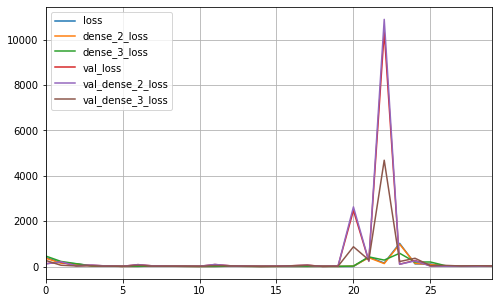

In [0]:
history_df.plot(figsize = (8,5))
plt.grid(True)
plt.gca().set_ylim()
plt.show()

In [0]:
model.evaluate(X_test_scaled, [y_test, y_test], verbose=2)

102/102 - 0s - loss: 53.0584 - dense_2_loss: 126.8643 - dense_3_loss: 156.7512


[53.05836456897212, 126.86425, 156.75116]

In [0]:
model.predict(X_test_scaled[:10])

[array([[10.553657],
        [22.087358],
        [22.546947],
        [36.604744],
        [27.420277],
        [20.098812],
        [36.980175],
        [24.49047 ],
        [23.109081],
        [21.00022 ]], dtype=float32), array([[12.21357 ],
        [21.03697 ],
        [21.31281 ],
        [34.94331 ],
        [23.30833 ],
        [19.74832 ],
        [35.29553 ],
        [20.679358],
        [25.115099],
        [21.024912]], dtype=float32)]